In [ ]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as si

In [ ]:
start_date = dt.datetime(2017,5,30)
end_date = dt.datetime(2019,5,24)
tickers = ['AAPL', 'F','FB','GM','GS','GOOG','JPM','UBS']
shares = web.DataReader(tickers,'yahoo',start_date,end_date)['Close']
returns = shares.pct_change().dropna()
log_returns = np.log(1+returns)

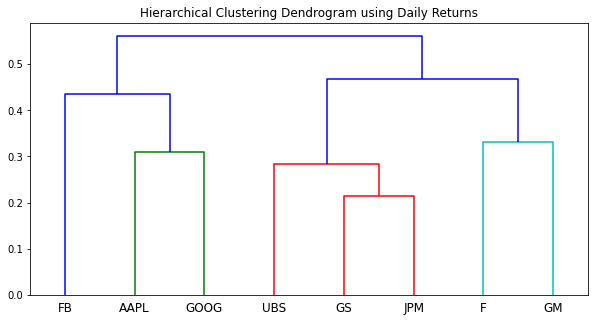

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(log_returns.T)
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram using Daily Returns')
plot_dendrogram(model, labels=tickers, leaf_font_size=12, orientation='top')
plt.show()